## Collaborative Filtering

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


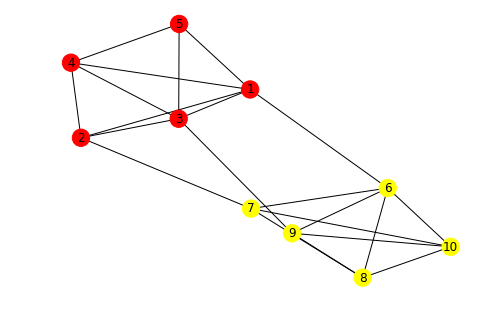

In [2]:
# Create an empty graph with no nodes and no edges using the Graph() function
G = nx.Graph()

# Add multiple nodes to the graph using add_node_from
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])

# Add multiple nodes to the graph using add_node_from
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (3,4), (4,5), (3,5), 
                  (1,6), (2,7), (3,9),
                  (6,7), (6,8), (6,9), (6,10), (7,8), (7,10), (8,9), (8,10), (9,10)])

# Examine the nodes and edges, give colors and metadata: 
# red nodes 1-5 (republican) and blue nodes 6-10 (democrat)
color_map = []
for i in G:
    if i <= 5:
        G.node[i]['Political View'] = 'Republican'
        color_map.append('red')
    else: 
        G.node[i]['Political View'] = 'Democrat'
        color_map.append('yellow')      
nx.draw(G,node_color = color_map,with_labels = True)
plt.show()

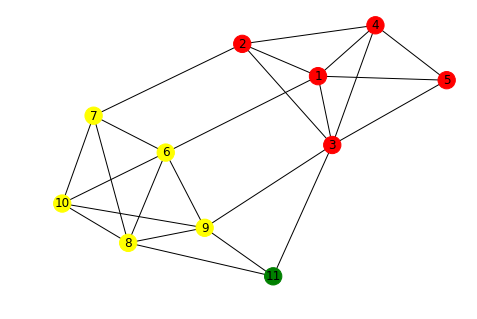

In [3]:
# Generate a shuffled list to pull random nodes to connect to without repeats
nodelist = list(range(1, 10))
random.shuffle(nodelist)

# Add a new node 11 to network with some random connections, give yellow color
G.add_edges_from([(11, nodelist.pop()), (11, nodelist.pop()), (11, nodelist.pop())])
color_map.append('green') 

nx.draw(G,node_color = color_map,with_labels = True)
plt.show()

In [4]:
# Generate a list of all neighbors to the new unknown node 11
list_of_neighbors = [n for n in G.neighbors(11)]
print(list_of_neighbors)

[8, 3, 9]


In [5]:
# Pull information from neighboring nodes to predict political views!
list_of_data = [G.node[n]['Political View'] for n in list_of_neighbors]
print(list_of_data)

['Democrat', 'Republican', 'Democrat']


In [6]:
# Generate some prediction algorithm based on data pulled from neighbors
democrat_count = list_of_data.count('Democrat')
print('I have', democrat_count, 'friends that are democrats!')
republican_count = list_of_data.count('Republican')
print('I have', republican_count, 'friends that are republicans!')

if democrat_count > republican_count:
    G.node[11]['Political View'] = 'Democrat'
    print('Since I have more democrat friends, I must be a democrat as well!')
else:
    G.node[11]['Political View'] = 'Republican'
    print('Since I have more republican friends,I must be a republican as well!')   
    

I have 2 friends that are democrats!
I have 1 friends that are republicans!
Since I have more democrat friends, I must be a democrat as well!
